# Cryptocurrency Cluster

In [1]:
#Inport Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Loading data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df_crypto = df_crypto[df_crypto['IsTrading'] == True]
df_crypto1 = df_crypto.drop("IsTrading",axis=1)
df_crypto2 = df_crypto1.dropna()
df_crypto3 = df_crypto2.loc[df_crypto1['TotalCoinsMined'] > 0]
df_crypto4 = df_crypto3.drop(["CoinName","Unnamed: 0"],1)
df_crypto4['TotalCoinSupply'] = df_crypto4['TotalCoinSupply'].astype(str).astype(float)
df_crypto4

C:\Users\George\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [4]:
# for column in df_crypto.columns:
#     print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")
df_dummies_crypto = pd.get_dummies(df_crypto4)
df_dummies_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Count of rows with null values
df_crypto4.isnull().sum()

Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [14]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies_crypto)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [15]:
# Add missing dummy variables to testing set
for col in df_dummies_crypto.columns:
    if col not in df_dummies_crypto.columns:
        df_dummies_crypto[col]=0

In [16]:
new_df_crypto = pd.DataFrame(scaled_data, columns=df_dummies_crypto.columns[0:])
new_df_crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.149176,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.132179,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


# Dimensionality Reduction

In [17]:
# Initialize PCA model for .95 principal components
pca = PCA(n_components=.95
         )

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [18]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-0.335099,1.032189,-0.590713,0.001397,-2.275522e-14,-1.358816e-15,2.424879e-12,-0.007129,-1.319756,-0.051813,...,2.516671e-16,1.469158e-15,-4.705539e-15,8.143207e-17,6.728816e-15,-4.224955e-15,3.936058e-15,-4.190601e-15,-0.677740,0.194423
1,-0.318434,1.032331,-0.591126,0.001386,-2.284032e-14,-1.553015e-15,2.404636e-12,-0.007739,-1.322514,-0.056674,...,-1.916858e-16,1.015303e-15,-5.188547e-15,2.676954e-16,7.040394e-15,-3.937913e-15,3.948824e-15,-4.092717e-15,-0.677741,0.194452
2,2.305468,1.656383,-0.683617,0.004731,-3.473324e-14,-4.858845e-15,8.330086e-12,-0.054781,-1.542879,-0.943951,...,2.523135e-14,-2.453224e-14,-1.564835e-15,-4.759012e-14,-1.136904e-13,6.551219e-17,-9.469384e-14,-2.730800e-14,0.619545,0.421467
3,-0.145184,-1.320593,0.192813,-0.001229,8.275603e-15,-1.961117e-16,-2.163443e-12,-0.002071,0.281463,0.251862,...,1.301253e-15,-1.353679e-15,1.802014e-15,-1.309231e-14,-1.839098e-14,1.544122e-16,-1.521019e-14,-1.246428e-14,0.238515,0.162774
4,-0.151768,-2.036192,0.396182,-0.001705,2.224422e-14,1.986265e-15,-2.992882e-12,0.027735,0.519099,0.188820,...,5.628159e-16,5.701472e-14,5.383397e-15,3.406507e-14,7.740442e-16,3.072084e-14,-9.853168e-14,-7.473918e-14,0.222678,-0.073823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-1.968217e-14,-1.180656e-14,-1.460044e-11,-0.851713,2.041159,3.560713,...,3.117079e-15,-2.434152e-15,3.629574e-15,-1.411269e-14,-1.774336e-14,7.806125e-17,-1.773988e-14,-1.011997e-14,0.267397,0.150859
528,-0.333144,1.032071,-0.590740,0.001399,-2.285574e-14,-1.550171e-15,2.428916e-12,-0.007154,-1.320125,-0.052460,...,8.157708e-17,1.131887e-15,-4.885290e-15,2.670096e-16,7.044736e-15,-3.973232e-15,3.749293e-15,-4.161894e-15,-0.677728,0.194422
529,0.324349,-2.312308,0.421515,-0.001319,1.735394e-14,9.816856e-16,-2.305043e-12,0.017309,0.161077,-0.047787,...,1.596564e-14,5.286292e-15,2.535648e-14,-1.178999e-14,-1.206461e-15,2.066208e-14,-2.324950e-14,-5.476696e-15,0.185818,-0.020671
530,-0.149364,-2.049336,0.412968,-0.001745,1.721382e-14,1.578142e-15,-3.060271e-12,0.028954,0.544389,0.233373,...,-1.359687e-15,-2.030606e-15,-2.131097e-15,1.482687e-15,-4.428458e-16,8.838746e-16,-3.485028e-16,2.119259e-16,-0.159409,0.022899


In [19]:
df_crypto_pca.shape

(532, 79)

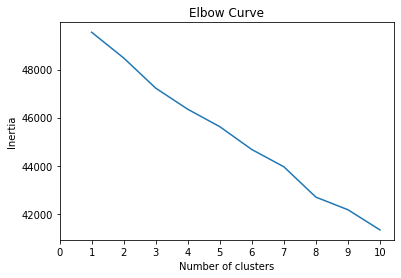

In [20]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    

In [21]:
# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=20,learning_rate=100)
tsne_features = tsne.fit_transform(df_crypto_pca)

In [22]:
# Check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

In [23]:
transformed_features  = tsne.fit_transform(tsne_features)
transformed_features

array([[  0.8885008,  11.615295 ],
       [ -4.8201222,  -2.665602 ],
       [ 10.072481 ,  33.51957  ],
       ...,
       [ 29.624775 ,  24.008883 ],
       [ 29.410305 , -15.028913 ],
       [-22.28486  ,  19.003012 ]], dtype=float32)

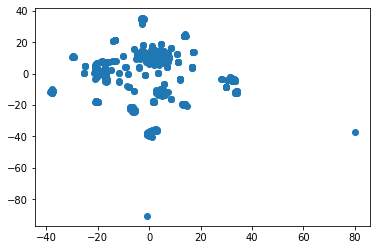

In [24]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

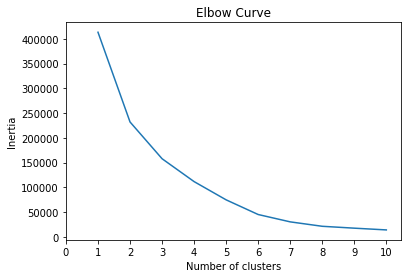

In [25]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
X_pca_tsne = pd.DataFrame(tsne_features)

In [27]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [40]:
clusters = get_clusters(4, X_pca_tsne)
clusters

,0,1,class
0,-16.820051,-5.046205,3
1,-18.747883,7.609495,3
2,-37.799530,-10.028922,3
3,33.258530,-4.495664,1
4,16.928789,13.949459,0
...,...,...,...
527,28.467226,-3.528677,1
528,-20.733421,3.615064,3
529,-3.221734,34.517048,0
530,13.758968,23.813303,0


In [41]:
clusters = pd.DataFrame(clusters)
clusters = clusters.rename(columns = {0:'1'})
clusters = clusters.rename(columns = {1:'2'})

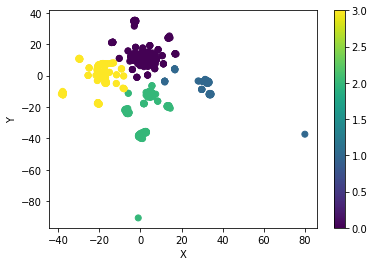

In [42]:
def show_clusters(df):
    plt.scatter(df["1"], df["2"], c=df['class'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
show_clusters(clusters)

# Recommendation

###### As per my understanding, the cryptocurrencies can be clustered together.
###### From the elbow curve, it seems 4 clusters will be the ideal for this model.
